# 00. はじめに
本内容は、様々な特徴量(部屋数や犯罪発生率)から住宅価格を予想するScikit-learnの実験用データを用いた、機械学習のハンズオン資料です。

理解しやすいように、最初から全てを混ぜた説明をせずに、１つ１つの処理を分けて説明しています。  
以上の理由から、実践的な作業の流れになっていませんので、その点御理解下さい。


# 01. 準備


## ライブラリのインポート
機械学習の実装を行うに当たって、役に立つライブラリにをインポート。

ライブラリの説明は下記の通り。

### Pandas
- 概要  
データ解析を支援する機能を提供するライブラリ。数表や時系列データを操作するためのデータ構造と演算を提供。

- 特徴
 - データ操作のための高速で効率的なDataFrame (行列型) オブジェクト
 - メモリ内のデータ構造と複数のフォーマット(CSV, TXT, xls, xlsx, )のデータ間で相互に読み書きするためのツール群
 - データ処理(カウント, 集計, 変換, 欠損値処理, マージ, 結合, etc...)
 - 時系列データ処理(日, 週, 月, 四半期, 年)

### Matplotlib(mpl_toolkits含む)
- 概要  
グラフ描画の為のライブラリ。

- グラフの種類
 - 折れ線グラフ
 - 散布図
 - ヒストグラム
 - ヒートマップ
 - 3Dグラフ

### Seaborn
- 概要  
Matplotlibの機能を**より美しく、またより簡単**に実現するためのライブラリ。

- グラフの種類
 - 折れ線グラフ
 - 散布図
 - ヒストグラム
 - ヒートマップ

### Numpy
- 概要  
プログラミング言語Pythonにおいて数値計算を効率的に行うためのライブラリ。

効率的な数値計算を行うための型付きの多次元配列（例えばベクトルや行列など）のサポートをPythonに加えるとともに、それらを操作するための大規模な高水準の数学関数ライブラリを提供。

### scikit-learn
- 概要  
Pythonのオープンソース機械学習ライブラリ。
Pythonの数値計算ライブラリのNumPyとSciPyとやり取りするよう設計されている。

In [0]:
# No.1
# ライブラリのインポート
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

# Jupyter Notebookの中でグラフ等をインライン表示する場合の設定（これが無いと別ウィンドウでグラフが開く）
%matplotlib inline 

## データの読込・確認
scikit-learn付属の実験用データを読み込み。

実験用データは米国ボストン市郊外の地域別の13種類の特徴と住宅価格の統計情報。

In [0]:
# No.2
# データの読込
from sklearn.datasets import load_boston
boston = load_boston()

データの確認
- data: 説明変数
- feature_names: 特徴名
- DESCR: データの概要
- target: 目的変数



In [0]:
# No.3
# データの確認
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

読み込んだデータをPandasのDataFrameに変換。

※DataFrameとは簡単に言うと行列データで、機械学習を行う際に扱いやすいデータ形式。

In [0]:
# No.4
# data(説明変数)をDataFrameに変換
df = pd.DataFrame(boston.data, columns=boston.feature_names)

# DataFrameにPrice項目を追加して、target(目的変数)をセット
df['PRICE'] = boston.target

データの内容を確認

各項目(特徴)の説明
- CRIM: 犯罪発生率
- ZN: 住居区画の密集度
- INDUS:	非小売業の土地割合
- CHAS: チャールズ川 (1: 川の周辺, 0: それ以外)
- NOX:	NOX濃度(排ガスなど空気の汚染濃度)
- RM: 住居の平均部屋数
- AGE: 1940年より前に建てられた物件割合
- DIS: 5つのボストン市の雇用施設からの重み付き距離
- RAD: 大きな道路へのアクセスしやすさ
- TAX: $10,000ドルあたりの所得税率
- PTRATIO: 教師あたりの生徒数
- B: 黒人の比率 1000(Bk – 0.63)^2
- LSTAT: 低所得者の割合
- PRICE: 家の値段(単位: 1,000ドル)

In [0]:
# No.5
# データの先頭5行を確認
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# 02. モデルの作成

## 線形回帰によるモデルの作成
- カラム[CRIM]と線形回帰分析を用いて学習処理を実施する
- 線形回帰分析の数式 : y = θ0 + θ1X1 + θ2X2 + θ3X3 + .... + θX
- 本処理の数式 : y[Price] = θ0[y切片] + θ1[傾き] * X1[OverallQual]

In [0]:
# No.6
# XにOverallQual、yにSalePriceをセット
X = df[['CRIM']].values
y = df[['PRICE']].values

# アルゴリズムに線形回帰(Linear Regression)を採用
slr = LinearRegression()

# fit関数でモデル作成
slr.fit(X,y)

# 偏回帰係数(回帰分析において得られる回帰方程式の各説明変数の係数)を出力
# 偏回帰係数はscikit-learnのcoefで取得
print('傾き：{0}'.format(slr.coef_[0]))

# y切片(直線とy軸との交点)を出力
print('y切片: {0}'.format(slr.intercept_))

傾き：[-0.41519028]
y切片: [24.03310617]


線形回帰から導き出された数式
y[PRICE] = 24.01621976[y切片] + -0.41277468[傾き] * X[CRIM]

## 線形回帰から導き出される数式とデータセットを図示
- plt.scatter(X, y) : 散布図
- plt.plot(X,slr.predict(X),color='red') : 折れ線グラフ

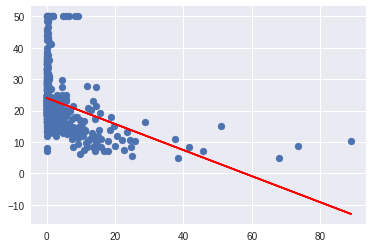

In [0]:
# No.7
# 散布図を描画
plt.scatter(X,y)

# 折れ線グラフを描画
plt.plot(X,slr.predict(X),color='red')

# 表示
plt.show()

## 作成したモデルの評価
平均二乗誤差(Mean Squared Error)、略してMSEにてモデルの評価。

算出された数字が小さいほどモデルの誤差が小さい。

In [0]:
# No.8
# MSEにてモデルの評価
from sklearn.metrics import mean_squared_error
y_pred = slr.predict(X)
mse = mean_squared_error(y, y_pred)
print(mse)

71.69073588196659


In [0]:
# No.9
# y_predの行数を繰り返し回数とする
number_of_iterations = int(y_pred.shape[0])

# 全行の答え合わせ
for i in range(number_of_iterations):
 print(f'y = {float(y[i])}, y_pred = {float(y_pred[i])}, 差額 = {float(y[i]) - float(y_pred[i])}')

y = 24.0, y_pred = 24.030482171567456, 差額 = -0.030482171567456362
y = 21.6, y_pred = 24.02176732763402, 差額 = -2.4217673276340186
y = 34.7, y_pred = 24.021775631439578, 差額 = 10.678224368560425
y = 33.4, y_pred = 24.01966646482777, 差額 = 9.38033353517223
y = 36.2, y_pred = 24.00443728543384, 差額 = 12.195562714566162
y = 28.7, y_pred = 24.020712744328115, 差額 = 4.679287255671884
y = 22.9, y_pred = 23.996449024486758, 差額 = -1.096449024486759
y = 27.1, y_pred = 23.973090419451253, 差額 = 3.126909580548748
y = 16.5, y_pred = 23.945401379817095, 差額 = -7.4454013798170955
y = 18.9, y_pred = 23.9625072192672, 差額 = -5.0625072192672
y = 15.0, y_pred = 23.939734032523557, 差額 = -8.939734032523557
y = 18.9, y_pred = 23.984333772177195, 差額 = -5.084333772177196
y = 21.7, y_pred = 23.994169629861002, 差額 = -2.2941696298610026
y = 20.4, y_pred = 23.771635944704073, 差額 = -3.3716359447040745
y = 18.2, y_pred = 23.768231384425167, 差額 = -5.568231384425168
y = 19.9, y_pred = 23.772619945662733, 差額 = -3.872619945662

# 03. モデルの改善
最初に作成したモデルは、工夫もなくデータを読み込み、scikit-learnで学習させたもの。

ここからは、「データの調査」、「データの前処理」等、モデルの精度をあげる為の作業を実施。

## 予測したいデータを調査する
PRICEデータを理解する。

PRICEデータの傾向、PRICEデータと関連の深いデータを知る。

### 基本統計量の表示

|項目名|意味|
|--|--|
|count|データ件数|
|mean|平均|
|std|標準偏差|
|min|最小値|
|25%|第1四分位数|
|50%|第2四分位数|
|75%|第3四分位数|
|max|最大値|

- 四分位数:データを大きさの順に並べたときに下から25％に位置する値・50%に位置する値・75%に位置する値のことをいう。[詳しくはこちら](https://atarimae.biz/archives/19162)

- 標準偏差:データのばらつきの大きさを表わす指標。[詳しくはこちら](https://atarimae.biz/archives/5379)


In [0]:
# No.10
# 基本統計量の表示
df.PRICE.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: PRICE, dtype: float64

### ヒストグラムで分析
- 横軸にPRICE
- 縦軸に割合

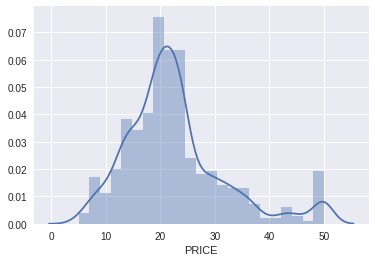

In [0]:
# No.11
# ヒストグラムの表示
sns.distplot(df.PRICE)

- 20,000$位のデータの割合が最も多い
- 極端に高い金額のものが存在する
- 正規分布(グラフにしたときに数値の大半が中央に集中し、左右対称の釣り鐘型に「分布」するデータ)ではない

**Note. 機械学習における正規分布の効果とは**  
予測しようとしている値が正規分布に従った方が精度がよくなる

## PRICEと相関係数の高い上位10個のデータを調査

### 相関係数とは
相関関係を指し示す係数のこと

### 相関関係とは
片方の変数が変化すれば、もう一方の変数も変化するという、2つの変数間の関係性をあらわしているもの

2種類のデータの（直線的な）関係性の強さを −1 から ＋1 の間の値で表しており、
正(+)の相関の場合は、片方の変数が大きくなればもう片方の変数も大きくなり、
負(-)の相関の場合は、片方の変数が大きくなればもう片方の変数も小さくなる

なお、相関関係の強弱については下記の通り

|相関係数|相関の強さ|
|--|--|
|±0.2 ～ ±0.4|弱い相関がある|
|±0.4 ～ ±0.7|相関がある|
|±0.7 ～ ±0.9|強い相関がある|
|±0.9 ～ ±1.0|(ほぼ)完全な相関がある|

### 注意点
相関関係は因果関係と同じものではない。疑似相関の場合がある
- 因果関係 : 2つの変数の間に原因と結果の関係があること
- 疑似相関 : 相関係数は高いが、2つの変数の間に因果関係がないこと

疑似相関については[Wiki](https://ja.wikipedia.org/wiki/%E6%93%AC%E4%BC%BC%E7%9B%B8%E9%96%A2)の例が分かりやすい

In [0]:
# No.12
# 相関係数を算出
corrmat = df.corr()
corrmat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


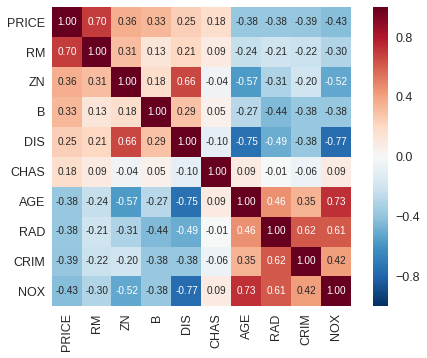

In [0]:
# No.13
# 算出した相関係数を相関が高い順に上位10個のデータを表示

# ヒートマップに表示させるカラムの数
k = 10

# SalesPriceとの相関が大きい上位10個のカラム名を取得
cols = corrmat.nlargest(k, 'PRICE')['PRICE'].index

# SalesPriceとの相関が大きい上位10個のカラムを対象に相関を算出
# .T(Trancepose[転置行列])を行う理由は、corrcoefで相関を算出する際に、各カラムの値を行毎にまとめなければならない為
cm = np.corrcoef(df[cols].values.T)

# ヒートマップのフォントサイズを指定
sns.set(font_scale=1.25)

# 算出した相関データをヒートマップで表示
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


ヒートマップからPRICEと相関が高いのはRM(住居の平均部屋数)だと分かる

## 線形回帰によるモデルの作成
- カラム[RM]と線形回帰分析を用いて学習処理を実施する

In [0]:
# No.14
# XにOverallQual、yにSalePriceをセット
X = df[['RM']].values
y = df[['PRICE']].values

# アルゴリズムに線形回帰(Linear Regression)を採用
slr = LinearRegression()

# fit関数でモデル作成
slr.fit(X,y)

# 偏回帰係数(回帰分析において得られる回帰方程式の各説明変数の係数)を出力
# 偏回帰係数はscikit-learnのcoefで取得
print('傾き：{0}'.format(slr.coef_[0]))

# y切片(直線とy軸との交点)を出力
# 余談：x切片もあり、それは直線とx軸との交点を指す
print('y切片: {0}'.format(slr.intercept_))

傾き：[9.10210898]
y切片: [-34.67062078]


## 線形回帰から導き出される数式とデータセットを図示
- plt.scatter(X, y) : 散布図
- plt.plot(X,slr.predict(X),color='red') : 折れ線グラフ

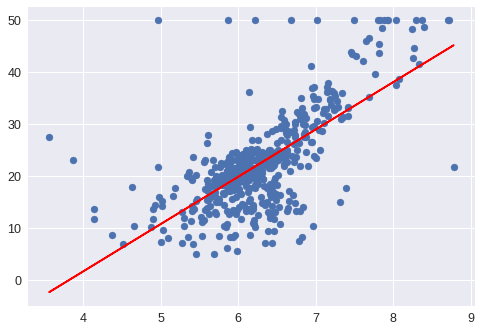

In [0]:
# No.15
# 散布図を描画
plt.scatter(X,y)

# 折れ線グラフを描画
plt.plot(X,slr.predict(X),color='red')

# 表示
plt.show()

## 作成したモデルの評価
平均二乗誤差(Mean Squared Error)、略してMSEにてモデルの評価。

算出された数字が小さいほどモデルの誤差が小さい。

In [0]:
# No.16
# MSEにてモデルの評価
from sklearn.metrics import mean_squared_error
y_pred = slr.predict(X)
mse = mean_squared_error(y, y_pred)
print(mse)


# 前回のMSE: 71.85234666526337

43.60055177116956


## PRICEとRMの散布図の表示
PRICEと相関の強いRMの散布図を表示

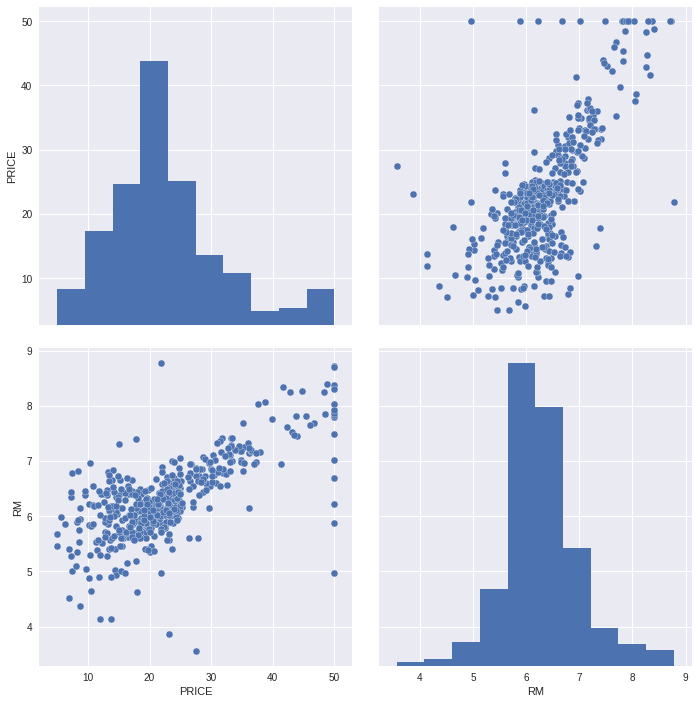

In [0]:
# No.17
# 散布図の表示
sns.set()
cols = ['PRICE', 'RM']
sns.pairplot(df[cols], size = 5)
plt.show()

一番右上の散布図を見てみると、傾向から大幅に外れているデータが見受けられる。

このデータを不適切な学習データとみなして削除。

## 不適切な学習データの削除

In [0]:
# No.18
# RMの数値の小さい上位2位のデータを表示
df.sort_values(by = 'RM')[:2]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
365,4.55587,0.0,18.1,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12,27.5
367,13.52220,0.0,18.1,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33,23.1


In [0]:
# No.19
# PRICE == 50 のデータをRMの降順で表示
df[df['PRICE'] == 50].sort_values(by = 'RM', ascending=False)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
225,0.52693,0.0,6.20,0.0,0.5040,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0
257,0.61154,20.0,3.97,0.0,0.6470,8.704,86.9,1.8010,5.0,264.0,13.0,389.70,5.12,50.0
163,1.51902,0.0,19.58,1.0,0.6050,8.375,93.9,2.1620,5.0,403.0,14.7,388.45,3.32,50.0
267,0.57834,20.0,3.97,0.0,0.5750,8.297,67.0,2.4216,5.0,264.0,13.0,384.54,7.44,50.0
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88,50.0
166,2.01019,0.0,19.58,0.0,0.6050,7.929,96.2,2.0459,5.0,403.0,14.7,369.30,3.70,50.0
283,0.01501,90.0,1.21,1.0,0.4010,7.923,24.8,5.8850,1.0,198.0,13.6,395.52,3.16,50.0
195,0.01381,80.0,0.46,0.0,0.4220,7.875,32.0,5.6484,4.0,255.0,14.4,394.23,2.97,50.0
186,0.05602,0.0,2.46,0.0,0.4880,7.831,53.6,3.1992,3.0,193.0,17.8,392.63,4.45,50.0
162,1.83377,0.0,19.58,1.0,0.6050,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92,50.0


In [0]:
# No.20
# RMが4未満のデータと、RMが
df = df.drop(index = df[df['RM'] < 4].index)
df = df.drop(index = df[(df['RM'] < 7) & (df['PRICE'] > 45)].index)

削除されているかを確認

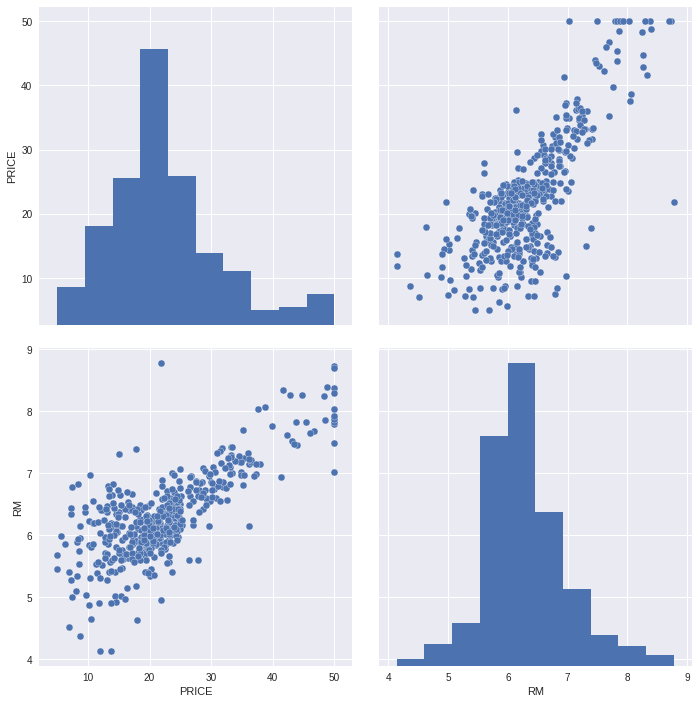

In [0]:
# No.21
# 散布図の表示
sns.set()
cols = ['PRICE', 'RM']
sns.pairplot(df[cols], size = 5)
plt.show()

## 線形回帰によるモデルの作成
- データの前処理を実施したカラム[RM]と線形回帰分析を用いて学習処理を実施する

In [0]:
# No.22
# XにOverallQual、yにSalePriceをセット
X = df[['RM']].values
y = df[['PRICE']].values

# アルゴリズムに線形回帰(Linear Regression)を採用
slr = LinearRegression()

# fit関数でモデル作成
slr.fit(X,y)

# 偏回帰係数(回帰分析において得られる回帰方程式の各説明変数の係数)を出力
# 偏回帰係数はscikit-learnのcoefで取得
print('傾き：{0}'.format(slr.coef_[0]))

# y切片(直線とy軸との交点)を出力
# 余談：x切片もあり、それは直線とx軸との交点を指す
print('y切片: {0}'.format(slr.intercept_))

傾き：[9.93647601]
y切片: [-40.27508405]


## 線形回帰から導き出される数式とデータセットを図示
- plt.scatter(X, y) : 散布図
- plt.plot(X,slr.predict(X),color='red') : 折れ線グラフ

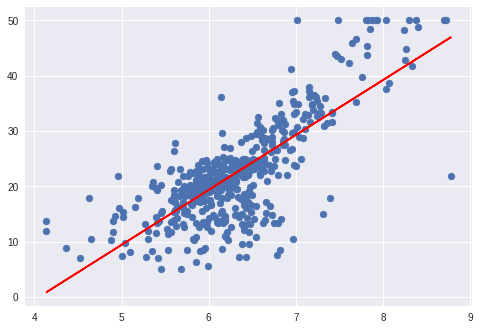

In [0]:
# No.23
# 散布図を描画
plt.scatter(X,y)

# 折れ線グラフを描画
plt.plot(X,slr.predict(X),color='red')

# 表示
plt.show()

## 作成したモデルの評価
平均二乗誤差(Mean Squared Error)、略してMSEにてモデルの評価。

算出された数字が小さいほどモデルの誤差が小さい。

In [0]:
# No.24
# MSE（平均二乗誤差 Mean Squared Error、小さいほどモデルの誤差が少ない）
from sklearn.metrics import mean_squared_error
y_pred = slr.predict(X)
mse = mean_squared_error(y, y_pred)
print(mse)

# 前回のMSE: 43.60055177116956
# 最初のMSE: 71.85234666526337

33.11088385956812
